<a href="https://colab.research.google.com/github/emiljor/2022_ML_EES/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV

# import cv2
import time

# from PIL import Image


rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

Data

In [4]:
df = pd.read_csv('Landslides.csv')

listofindex = ['dist_roads','DEM','TWI','plan_curvature','profil_curvature','Slope','Geology','LandCover','LS']

enc = OneHotEncoder(sparse=False) #One hot encoding for converting the columns with categorical values into seperate columns with binary values


geology= enc.fit_transform(df[['Geology']]) #Fits and transforms the dataframe coloum into multiple columns of 0 and 1
landcover = enc.fit_transform(df[['LandCover']]) #Fits and transforms the dataframe coloum into multiple columns of 0 and 1

geology_tranform = pd.DataFrame(geology) #transfor the array into a DataFrame
landcover_tranform = pd.DataFrame(landcover) #transfor the array into a DataFrame

geology_tranform= geology_tranform.add_prefix('g_') #Changes the prefix of the coloum into the specified one
landcover_tranform= landcover_tranform.add_prefix('lc_') #Changes the prefix of the coloum into the specified one

y = df['LS']
print(df['LS'].value_counts())
 #Removes the geology and Landcover coloums from the inputs dataframe since they are added as multiple colus of 0 and 1
X_temp = pd.DataFrame(df.drop(['Geology','LandCover','LS'],axis = 1)) #Defines the inputs_df as df and  a DataFrame and Removes the geology and Landcover coloums from the inputs dataframe since they are added as multiple colus of 0 and 1
X= X_temp.join(geology_tranform).join(landcover_tranform) #Adds the geology 0 and 1 colouns to the inputs_df


time0 = time.time()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=rnd_seed)

1    2594
0    2591
Name: LS, dtype: int64


Logistic regression

Accuracy: 0.8060747663551402
RMSE: 0.4403694285992839
Confusion matrix:


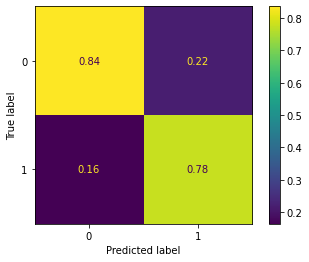

In [5]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train,y_train)
lr_pred= lr.predict(X_test)

#Confusion matrix
cm=confusion_matrix(y_test, lr_pred, normalize='pred') # Get a confusion matrix 'cm', use 'pred' for the normalize option
disp = ConfusionMatrixDisplay(confusion_matrix = cm) # Use ConfusionMatrixDisplay to visualize 'cm'

print("Accuracy:",accuracy_score(y_test, lr_pred))
print("RMSE:", mean_squared_error(y_test, lr_pred, squared=False))
print("Confusion matrix:", )
disp.plot()
lr_proba =lr.predict_proba(X_test)

Gradient boosting classifier

Accuracy: 0.8060747663551402
RMSE: 0.4403694285992839
Confusion matrix:


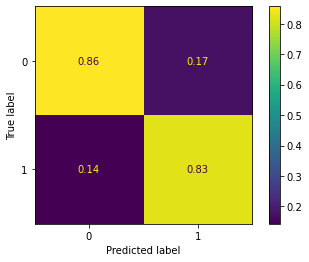

In [8]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test) 

print("Accuracy:",accuracy_score(y_test, lr_pred))
print("RMSE:", mean_squared_error(y_test, lr_pred, squared=False))
print("Confusion matrix:")
cm=confusion_matrix(y_test, gbc_pred, normalize='pred') # Get a confusion matrix 'cm', use 'pred' for the normalize option
disp = ConfusionMatrixDisplay(confusion_matrix = cm) # Use ConfusionMatrixDisplay to visualize 'cm'
disp.plot()


gbc_proba = gbc.predict_proba(X_test)


Producing susceptibility map with initial features

In [ ]:
DEM = cv2.imread('/Users/hakonvikesa/Documents/Machine learning/drive-download-20221202T084038Z-001/DEM.tif',-1)
distance_road = cv2.imread('/Users/hakonvikesa/Documents/Machine learning/drive-download-20221202T084038Z-001/dist_roads.tif',-1)
geology = Image.open('/Users/hakonvikesa/Documents/Machine learning/drive-download-20221202T084038Z-001/Geology.tif')
landcover = cv2.imread('/Users/hakonvikesa/Documents/Machine learning/drive-download-20221202T084038Z-001/LandCover.tif',-1)
plan_curvature = cv2.imread('/Users/hakonvikesa/Documents/Machine learning/drive-download-20221202T084038Z-001/plan_curvature.tif',-1)
profile_curvature = cv2.imread('/Users/hakonvikesa/Documents/Machine learning/drive-download-20221202T084038Z-001/profil_curvature.tif',-1)
slope = cv2.imread('/Users/hakonvikesa/Documents/Machine learning/drive-download-20221202T084038Z-001/Slope.tif',-1)
TWI = cv2.imread('/Users/hakonvikesa/Documents/Machine learning/drive-download-20221202T084038Z-001/TWI.tif',-1)

Feature selection

In [ ]:
#Feature selection for å definere de viktigste featurene for at disse brukes i til kartleggingen senere. Statistikk for å vise de beste featurene, confusion matrixen.
# 1. Variance Threshold Feature Selection. Useful for unsupervised modelling. The dataset is labeled and a supervised modell is most likely going to be used. 
# 2. Univariate Feature Selection with SelectKBest.
#    Univariate Feature Selection is a feature selection method based on the univariate statistical test, e,g: chi2, Pearson-correlation
# 3. Recursive Feature Elimination (RFE)
# 4. Feature Selection via SelectFromModel
# 5. Feature Selection Sequential Feature Selection (SFS)
# Determine the K best features and see how it changes the map compared to the no feature selection
#opt_n_features = sklearn.feature_selection.RFECV()
#sel_K_best = sklearn.feature_selection.SelectKBest()#chi2, k=2
#new_X =sel_K_best.fit_transform()#X, y)
# Successively reduce/change the attribute sets and investigate the changes in the classification results.
# Do i have to train a new modell for each set of parameters